In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


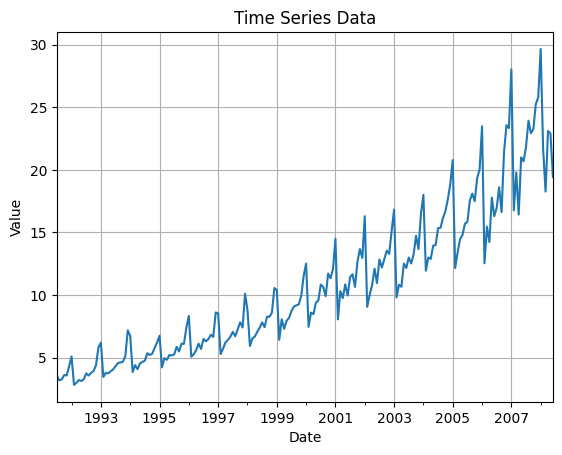

ADF Statistic: 3.14518568930675
p-value: 1.0
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  204
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -424.762
Date:                Sun, 13 Apr 2025   AIC                            855.524
Time:                        22:27:21   BIC                            865.463
Sample:                    07-01-1991   HQIC                           859.545
                         - 06-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3009      0.094      3.195      0.001       0.116       0.485
ma.L1         -0.8300      0.048    -17.204      0.000      -0.925      -0.735
sigma2 

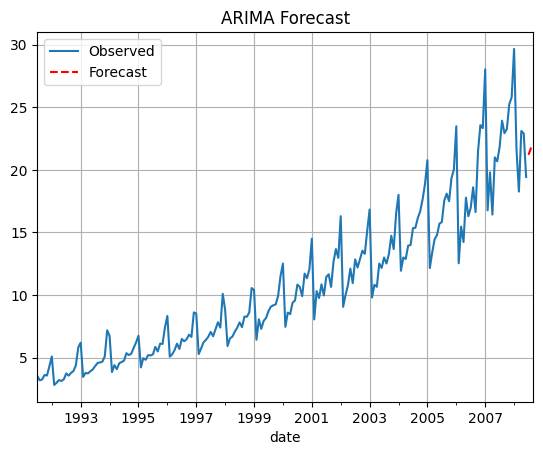

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv('sale.csv', parse_dates=['date'], index_col='date')
ts = df['value']

# Plot data
ts.plot(title='Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Check for stationarity
adf_result = adfuller(ts)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

# Fit ARIMA model (choose order based on ACF/PACF for bigger datasets; here assume (1,1,1))
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()

print(model_fit.summary())

# Forecast next 3 steps
forecast = model_fit.forecast(steps=3)
print("Forecasted values:")
print(forecast)

# Plot forecast
ts.plot(label='Observed')
forecast.plot(label='Forecast', style='--', color='red')
plt.legend()
plt.grid(True)
plt.title('ARIMA Forecast')
plt.show()


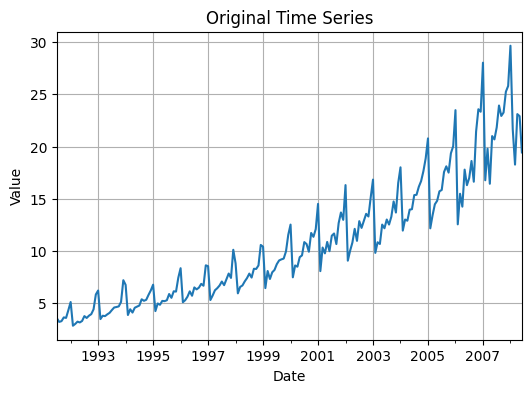

In [12]:
ts.plot(title='Original Time Series', figsize=(6, 4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


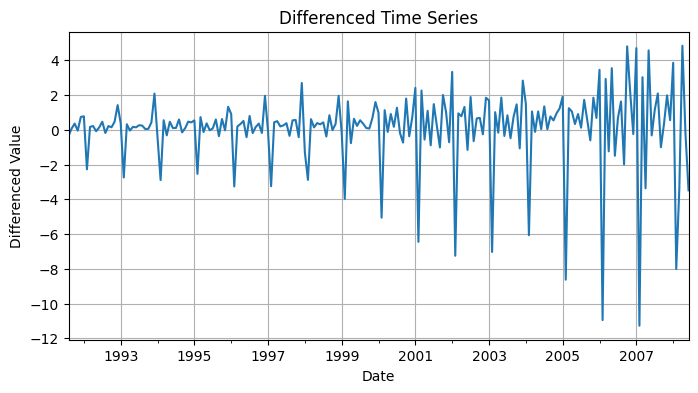

In [14]:
ts_diff = ts.diff().dropna()
ts_diff.plot(title='Differenced Time Series', figsize=(8, 4))
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.grid(True)
plt.show()


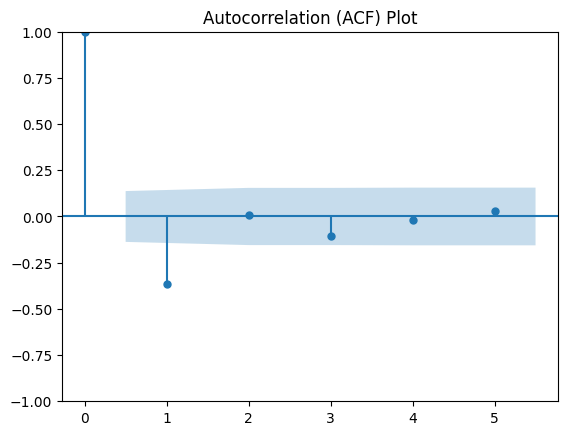

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts_diff, lags=5)
plt.title('Autocorrelation (ACF) Plot')
plt.show()


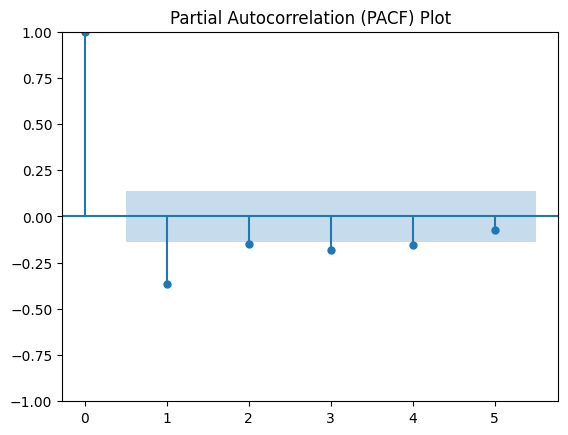

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ts_diff, lags=5)
plt.title('Partial Autocorrelation (PACF) Plot')
plt.show()
